In [22]:
import pandas as pd

In [23]:
# Load Data
data = pd.read_csv('../Datasets/Student_Performance.csv') 
data.head()  # Shows the first 5 rows of the data

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


In [24]:
data.shape

(10000, 12)

In [25]:
data.dtypes

roll_no                         object
gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                          float64
test_preparation_course        float64
math_score                      object
reading_score                  float64
writing_score                  float64
science_score                  float64
total_score                    float64
grade                           object
dtype: object

In [26]:
data.columns

Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


In [28]:
data.describe()

,lunch,test_preparation_course,reading_score,writing_score,science_score,total_score
count,9976.000000,9977.000000,9975.000000,9976.000000,9977.000000,9981.000000
mean,0.644246,0.388694,70.125915,71.415798,66.063045,264.740908
std,0.478765,0.487478,19.026245,18.245360,19.324331,42.304858
min,0.000000,0.000000,17.000000,10.000000,9.000000,89.000000
25%,0.000000,0.000000,57.000000,59.000000,53.000000,237.000000
50%,1.000000,0.000000,71.000000,72.500000,67.000000,268.000000
75%,1.000000,1.000000,85.000000,85.000000,81.000000,294.000000
max,1.000000,1.000000,100.000000,100.000000,100.000000,383.000000


In [29]:
# Missing values
print(data.isnull().sum())

roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64


Replace missing values with mean

In [30]:
# Convert math score (object) to float64
data['math_score'] = pd.to_numeric(data['math_score'], errors='coerce')

# Fill missing values with mean
data['math_score'] = data['math_score'].fillna(data['math_score'].mean())

In [31]:
data.dtypes

roll_no                         object
gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                          float64
test_preparation_course        float64
math_score                     float64
reading_score                  float64
writing_score                  float64
science_score                  float64
total_score                    float64
grade                           object
dtype: object

In [32]:
data.isnull().sum()

roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                      0
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64

Values - 

Categorical (object): roll_no, gender, race_ethnicity, parental_level_of_education, grade

Numerical (float64): Scores and test-related columns

In [33]:
# Fix missing values for numerical columns using mean
numerical_cols = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score', 'test_preparation_course', 'lunch']
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce') 
    data[col] = data[col].fillna(data[col].mean())


In [34]:
data['gender'].mode()[0]

'female'

In [35]:
data['race_ethnicity'].mode()[0]

'group C'

In [36]:
# Fix missing values for categorical columns using mode
categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'grade']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [37]:
# Drop row with missing roll_no
data.dropna(subset=['roll_no'], inplace=True)

In [38]:
print(data.isnull().sum())  # Should all be zero now
print(data.dtypes)          # Check final types

roll_no                        0
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64
roll_no                         object
gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                          float64
test_preparation_course        float64
math_score                     float64
reading_score                  float64
writing_score                  float64
science_score                  float64
total_score                    float64
grade                           object
dtype: object


In [39]:
print("\n\nThe features in the dataset are as follows : ")
print("1. math score : ", data['math_score'].dtype)
print("2. reading score : ", data['reading_score'].dtype)
print("3. writing score : ", data['writing_score'].dtype)



The features in the dataset are as follows : 
1. math score :  float64
2. reading score :  float64
3. writing score :  float64


Outliers

In data science, an outlier is a value in a dataset that is much larger or smaller than the other values.

Finding Outliers: 

There are 2 ways to find outliers. 

1. Z Score
2. IQR Technique

Z - Score

In [40]:
mean = data['math_score'].mean()
std = data['math_score'].std()

print(mean)
print(std)

57.18076494366229
21.720208577980546


In [41]:
def detect_outliers_zs(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers
    

In [42]:
import numpy as np
outliers_math = detect_outliers_zs(data['math_score'])
outliers_reading = detect_outliers_zs(data['reading_score'])
outliers_writing = detect_outliers_zs(data['writing_score'])

# Math
print("Total Math Outliers =", len(outliers_math))
print("Math Outliers:", outliers_math)
print()

# Reading
print("Total Reading Outliers =", len(outliers_reading))
print("Reading Outliers:", outliers_reading)
print()

# Writing
print("Total Writing Outliers =", len(outliers_writing))
print("Writing Outliers:", outliers_writing)
print()


Total Math Outliers = 0
Math Outliers: []

Total Reading Outliers = 0
Reading Outliers: []

Total Writing Outliers = 40
Writing Outliers: [10.0, 16.0, 10.0, 15.0, 16.0, 10.0, 10.0, 10.0, 16.0, 11.0, 10.0, 10.0, 12.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 16.0, 16.0, 10.0, 10.0, 13.0, 11.0, 10.0, 10.0, 14.0, 10.0, 10.0, 11.0, 13.0, 10.0, 15.0, 15.0, 15.0]



IQR to find Outliers

In [43]:


def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data,25)
    q3 = np.percentile(data, 75)
    # print(q3, q1)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR) 

    for i in data:
        if (i < lwr_bound or i > upr_bound):
                outliers.append(i)
    return outliers

In [44]:
outliers_math_iqr = detect_outliers_iqr(data['math_score'])
outliers_reading_iqr = detect_outliers_iqr(data['reading_score'])
outliers_writing_iqr = detect_outliers_iqr(data['writing_score'])

# Math
print("Total Math Outliers (IQR) =", len(outliers_math_iqr))
print("Math Outliers (IQR):", outliers_math_iqr)
print()

# Reading
print("Total Reading Outliers (IQR) =", len(outliers_reading_iqr))
print("Reading Outliers (IQR):", outliers_reading_iqr)
print()

# Writing
print("Total Writing Outliers (IQR) =", len(outliers_writing_iqr))
print("Writing Outliers (IQR):", outliers_writing_iqr)
print()


Total Math Outliers (IQR) = 0
Math Outliers (IQR): []

Total Reading Outliers (IQR) = 0
Reading Outliers (IQR): []

Total Writing Outliers (IQR) = 45
Writing Outliers (IQR): [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 12.0, 13.0, 13.0, 14.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 18.0, 18.0, 18.0, 19.0]



Box Plot for All Scores

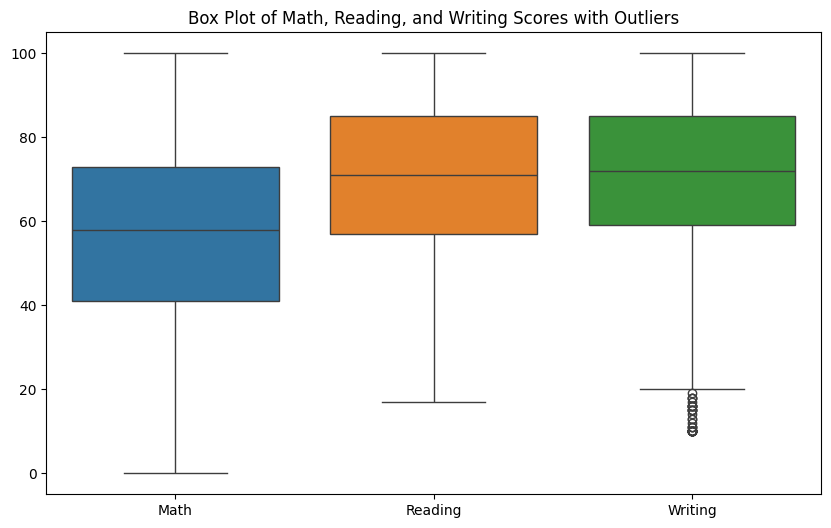

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the three score columns
score_data = pd.DataFrame({
    'Math': data['math_score'],
    'Reading': data['reading_score'],
    'Writing': data['writing_score']
})

# Create a box plot for the three score columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=score_data)
plt.title("Box Plot of Math, Reading, and Writing Scores with Outliers")
plt.show()

### Removing Outliers
replce the outliers values with the mean or median value and thus remove outliers from the dataset.

In [46]:

math_median = data['math_score'].median()
for i in outliers_math_iqr:
    data['math_score'].replace(to_replace=i, value=math_median, inplace=True)

write_median = data['writing_score'].median()
for i in outliers_writing_iqr:
  data['writing_score'].replace(to_replace=i, value=write_median, inplace=True)

read_median = data['reading_score'].median()
for i in outliers_reading_iqr:
    data['reading_score'].replace(to_replace=i, value=read_median, inplace=True)

C:\Users\saksh\AppData\Local\Temp\ipykernel_16576\2081748779.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['writing_score'].replace(to_replace=i, value=write_median, inplace=True)


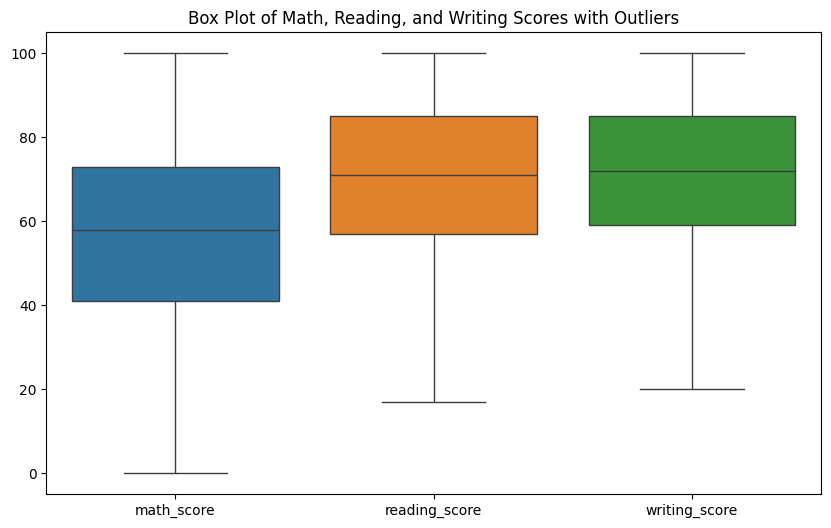

In [49]:
# Box Plot after removing outliers

new_score_data = data[['math_score','reading_score','writing_score']]
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_score_data)
plt.title("Box Plot of Math, Reading, and Writing Scores with Outliers")
plt.show()

### Data Transformation
- process of converting data from its original format into a different format or structure
- It helps in making data more interpretable -> Better model performance

#### Purposes/methods for Data Transformation
1) To Change the Scale for Better Understanding
2) To Convert a Non-Linear Relationship into a Linear One
3) To Decrease the Skewness and Convert Distribution to Normal

### 1. Change the Scale
 #### Common Techniques:
 1) Min-Max Scaling: Rescales data to a [0, 1] range
 2) Standardization (Z-score scaling): Centers data with mean = 0, std = 1

In [51]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

scaled_data = standard_scaler.fit_transform(data['total_score'].values.reshape(-1,1))

In [52]:
print(scaled_data)

[[-0.63265024]
 [ 1.49683345]
 [-0.01746606]
 ...
 [ 1.56781624]
 [ 1.68612089]
 [ 0.6687009 ]]


### 2. Convert a Non-Linear Relationship into a Linear
#### Common Techniques:
1) Log transformation
2) Square root / inverse
3) Polynomial transformations

### 3. To Decrease the Skewness and Convert Distribution to Normal
Skewed data (asymmetric distribution) can lower model performance.


| Skewness Value| Interpretation          |
|---------------|-------------------------|
| 0             | Perfectly symmetrical   |
| -0.5 to 0.5   | Approximately normal    |
| < -0.5        | Moderately left-skewed  |
| > 0.5         | Moderately right-skewed |
| < -1 or > 1   | Highly skewed           |

In [53]:
# Skewness
from scipy.stats import skew
original_skew = skew(data['total_score'])
print("Original Skewness:", original_skew)   # slightly left-skewed

Original Skewness: -0.30784663950436514


#### Skewness = -0.30 → Approximately Normal
Since it's slightly left-skewed, we want a transformation that pulls the left tail inward (i.e., stretches the right side more than the left).

In [54]:
# Square Transformation
data['total_score_squared'] = data['total_score'] ** 2

In [55]:
data.head()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade,total_score_squared
0,std-01,male,group D,some college,1.0,1.0,89.0,38.0,85.0,26.0,238.0,C,56644.0
1,std-02,male,group B,high school,1.0,0.0,65.0,100.0,67.0,96.0,328.0,A,107584.0
2,std-03,male,group C,master's degree,1.0,0.0,10.0,99.0,97.0,58.0,264.0,B,69696.0
3,std-04,male,group D,some college,1.0,1.0,22.0,51.0,41.0,84.0,198.0,D,39204.0
4,std-05,male,group C,some college,0.0,1.0,26.0,58.0,64.0,65.0,213.0,C,45369.0


In [57]:
new_skew = skew(data['total_score_squared'])
print("New Skewness:", new_skew) 

New Skewness: 0.129148919782399
